### Linear Regression (선형 회귀)

In [1]:
from IPython.display import Image

- 다음은 수면시간(sleep hours)과 심술(grumpiness)을 측정한 자료의 산점도이다.

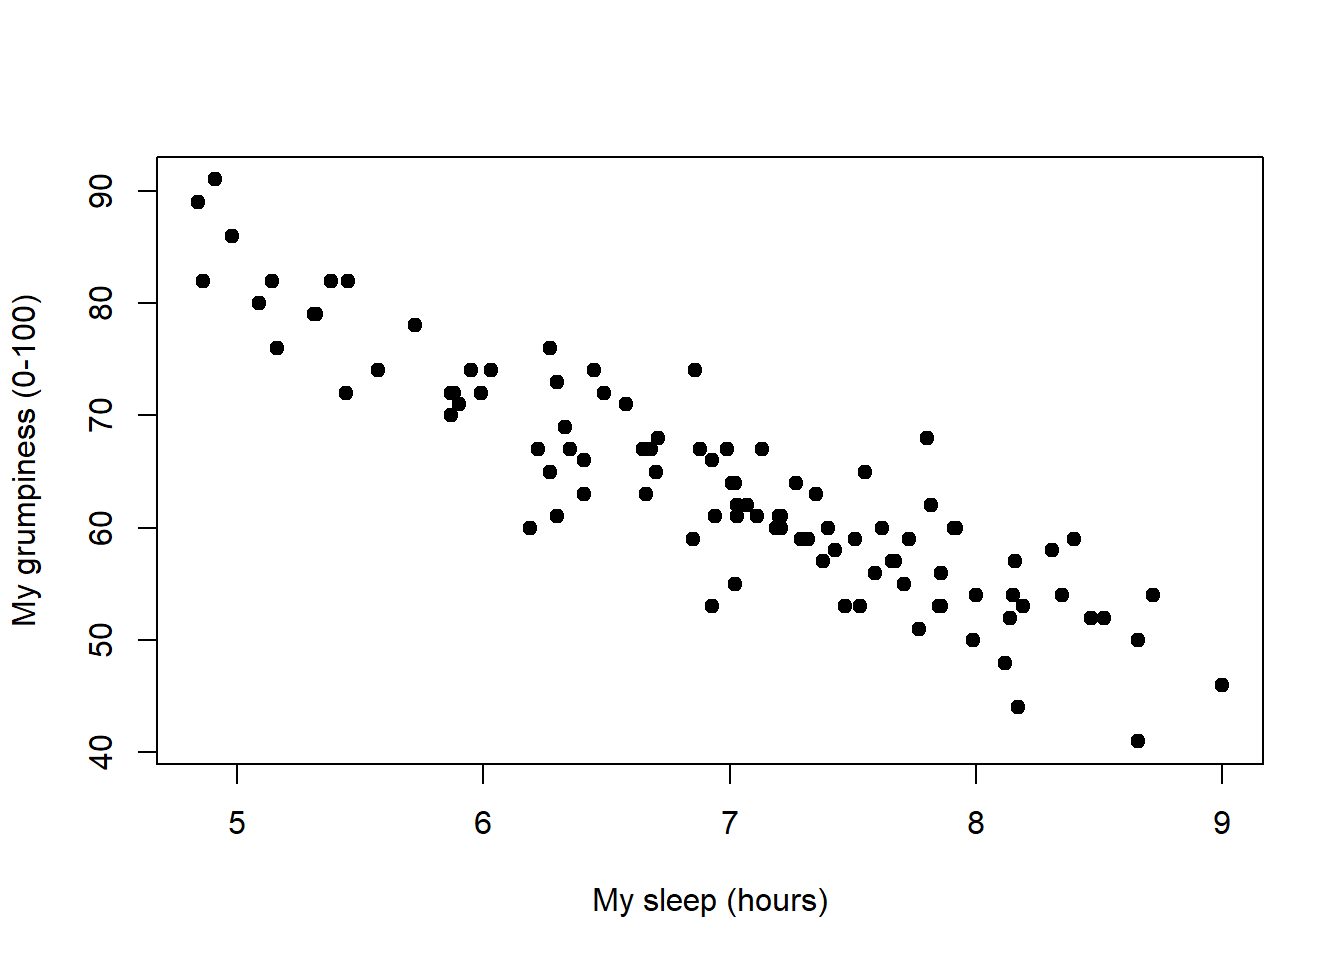

In [2]:
Image('C:/Users/com/Desktop/ML/Lecture_02/Lecture_02_figure_01.jpg', width = 600, height = 300)

- 산점도를 보면서 나도 모르게 가상의 선을 긋고 있지 않은가? 우리는 본능적으로 수면 시간이 늘어날수록 심술이 줄어든다는 것을 생각하고 있을 것이다. 

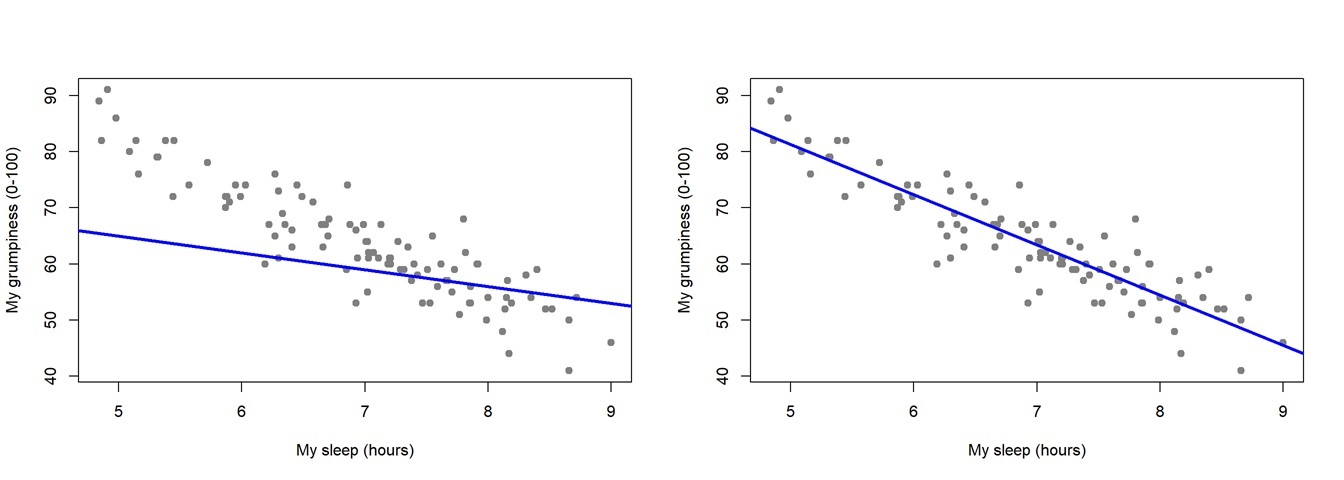

In [3]:
Image('C:/Users/com/Desktop/ML/Lecture_02/Lecture_02_figure_02.jpg')

- 위의 두 그림 중 본인이 그렸던 가상의 직선은 어느쪽인가? 아마 대다수의 사람들이 오른쪽 그림과 같은 직선을 상상했을 것이다. 왜 그렇게 생각했을까? 아마도 오른쪽 그림의 직선이 수면시간과 심술을 "잘" 설명했다고 느꼈기 때문일 것이다. 그렇다면 과연 "잘" 설명한다는 것은 어떤 기준으로 판단할 수 있을까?

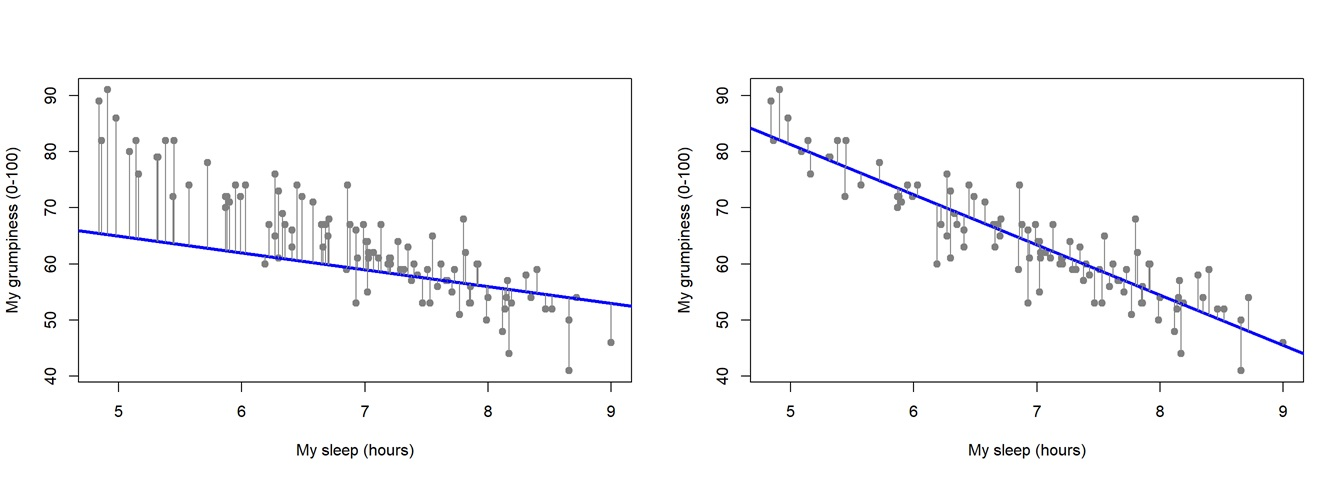

In [4]:
Image('C:/Users/com/Desktop/ML/Lecture_02/Lecture_02_figure_03.jpg')

- 수면시간과 심술의 관계를 "잘" 설명하는 직선은 아마도 산점도에 있는 점들 대부분이 직선과 가까운 위치에 있는 경우일 것이다. 심지어 어떤 점의 경우 직선 위에 놓여있을 정도로 가까운 직선이라면 우리가 찾던 직선일 가능성이 높다. 아쉽게도 모든 점이 직선 위에 놓일 수는 없기 때문에 우리는 직선이 모든 점에대해 가장 "가깝다"고 객관적으로 판단할 수 있는 기준을 삼아야한다. 그 기준을 "모든 점에서 떨어진 거리를 측정했을때 **'평균적'** 으로 가장 가까운 직선"으로 생각해 볼 수 있다.

- 이러한 직선을 찾는 방법을 우리는 선형 회귀(Linear Regression)이라고 한다. 위의 수면시간과 심술의 예시처럼 1개의 독립변수(X, 수면시간)를 통해 종속변수(Y, 심술)를 설명 또는 예측하는 경우 단순 선형 회귀(Simple Linear Regression)이라고 하며 1개 이상의 독립변수를 통해 종속변수를 설명 또는 예측하는 경우 다중 선형 회귀(Multiple Linear Regression)라고 한다.

※ 다중 선형 회귀의 경우 독립변수가 2개인 경우까지는 3차원 그래픽을 통해 회귀 평면(regression plane)을 시각적으로 확인할 수 있지만 독립변수가 3개 이상이 되면 시각적으로 확인이 불가능하다. 상상할 수 없지만 4차원 이상 고차원에서의 평면을 초평면(hyper plane)이라고 한다.

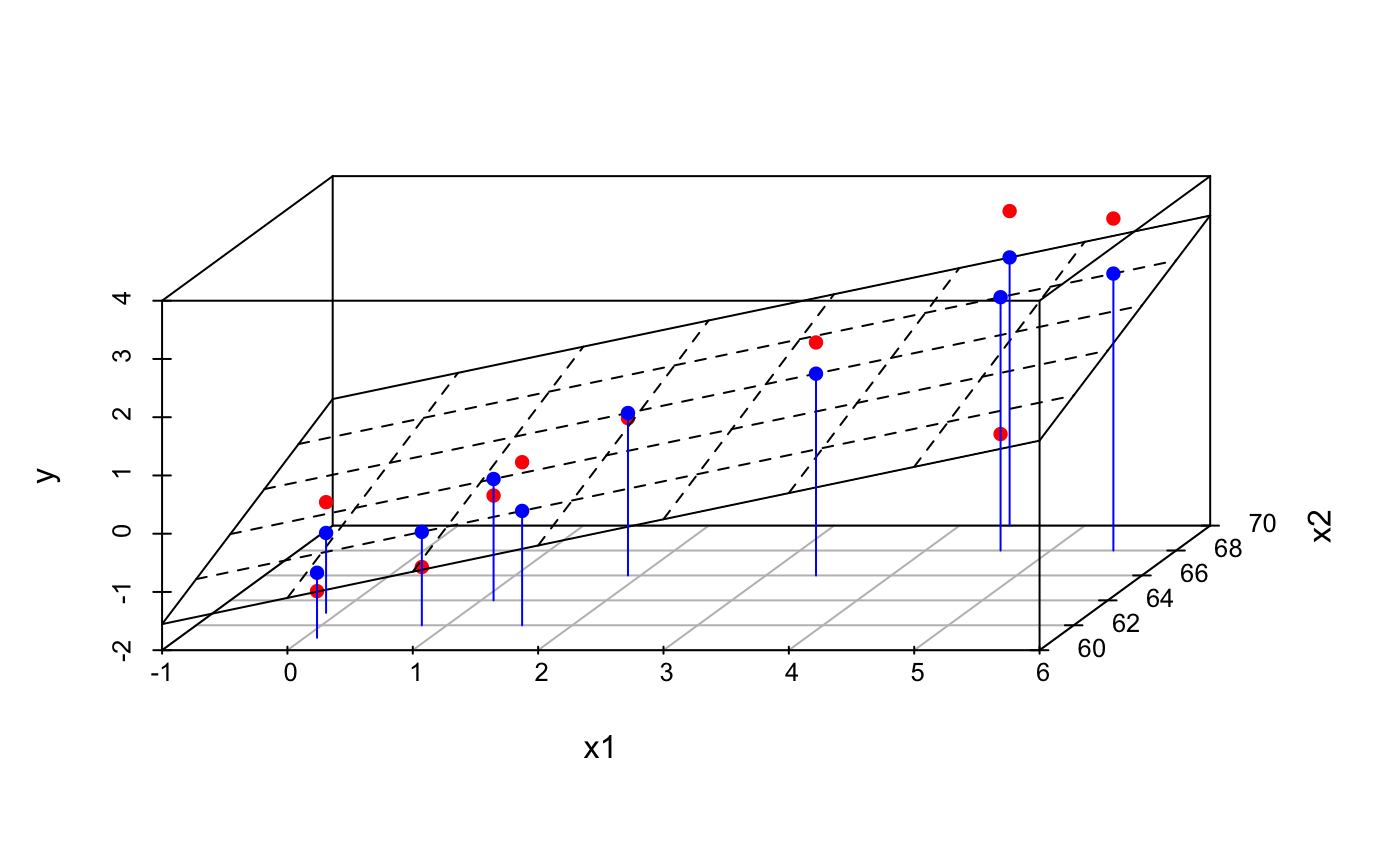

In [5]:
Image('C:/Users/com/Desktop/ML/Lecture_02/Lecture_02_figure_04.jpg', width = 600, height = 300)

- 우리는 머신러닝의 과정에서 선형 회귀를 다루는 만큼 직선이 구해지는 자세한 과정(OLS)은 구두로 간략하게 설명하고 모형으로서 선형 회귀를 바라보고자 한다.

※ 앞으로 나오는 "모형"은 "모델(model)"과 같은 말로 사용됨을 알린다.

- 선형 회귀 모형은 다음과 같다.

$y = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + \cdots + \beta_{p}x_{p} + \epsilon$

- 여기서 각 독립변수(X)들은 종속변수(Y)를 설명할 수 있는 변수들로 선택되어지며, 테스트 데이터로 학습하는 과정을 통해 각 독립변수가 종속변수에 어떠한 영향을 주는지 설명할 수 있는 $\beta$ (beta)값을 추정하게 된다. $\epsilon$ (epsilon)의 경우 우리가 선택한 독립변수들 이외에 종속변수에 영향을 줄 수 있는 노이즈(noise)를 모형에 고려하기 위해 추가된 것이다. 학습으로 $\beta$를 추정해 생성된 모형은 아래와 같다.

$\hat{y} = \hat{\beta_{0}} + \hat{\beta_{1}}x_{1} + \hat{\beta_{2}}x_{2} + \cdots + \hat{\beta_{p}}x_{p}$

### Linear Regression 실습 - California Housing 데이터셋

#### [데이터 설명]
- 데이터: 1990년 캘리포니아의 각 행정 구역 내 주택 가격  
- 관측치 개수: 20640개
- 변수 개수: 설명변수 8개 / 반응변수 1개

#### 독립변수
- MedInc : 행정 구역 내 소득의 중앙값
- HouseAge : 행정 구역 내 주택 연식의 중앙값
- AveRooms : 평균 방 갯수
- AveBedrms : 평균 침실 갯수
- Population : 행정 구역 내 인구 수
- AveOccup : 평균 자가 비율
- Latitude : 해당 행정 구역의 위도
- Longitude : 해당 행정 구역의 경도

#### 종속변수
- House Value: 주택가격

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# matplotlib 한글 문제
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

In [8]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [9]:
# 독립변수와 종속변수 분리
X = pd.DataFrame(california.data, columns=california.feature_names)
Y = pd.DataFrame(california.target, columns=['House Value'])

In [10]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
X.shape

(20640, 8)

In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [13]:
# intercept 추가
X = sm.add_constant(X, has_constant='add')

In [14]:
X.head()

,const,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,1.0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,1.0,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,1.0,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,1.0,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,1.0,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [15]:
Y.head()

,House Value
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [16]:
Y.shape

(20640, 1)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# 학습 데이터, 테스트 데이터 분리
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=1234)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(14447, 9) (6192, 9) (14447, 1) (6192, 1)


In [19]:
# 회귀 모델 생성
lm = sm.OLS(Y_train, X_train)
lm_train = lm.fit()

In [20]:
lm_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Value   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     2796.
Date:                Fri, 17 Sep 2021   Prob (F-statistic):               0.00
Time:                        12:26:09   Log-Likelihood:                -15806.
No. Observations:               14447   AIC:                         3.163e+04
Df Residuals:                   14438   BIC:                         3.170e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.3707      0.793    -45.860      0.000     -37.925     -34.816
MedInc         0.4423      0.005     87.209      0.000       0.432       0.452
HouseAge       0.0096      0.001     18.072      0.000       0.009       0.011
AveRooms      -0.1172      0.007    -16.205      0.000      -0.131      -0.103
AveBedrms      0.7227      0.035     20.493      0.000       0.654       0.792
Population -3.199e-06   5.72e-06     -0.560      0.576   -1.44e-05    8.01e-06
AveOccup      -0.0038      0.001     -7.074      0.000      -0.005      -0.003
Latitude      -0.4125      0.009    -47.826      0.000      -0.429      -0.396
Longitude     -0.4266      0.009    -47.141      0.000      -0.444      -0.409
==============================================================================
Omnibus:                     2901.126   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7930.369
Skew:                           1.075   Prob(JB):                         0.00
Kurtosis:                       5.925   Cond. No.                     2.39e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- 최종적으로 구축된 모형은 다음과 같다.
<br><br>
$Y_{mpg} = - 36.3707 + 0.4423 X_{MedInc} + 0.0096 X_{HouseAge} - 0.1172 X_{AveRooms} + 0.7227 X_{AveBedrms} - 3.199e-06 X_{Population} - 0.0038 X_{AveOccup} - 0.4125 X_{Latitude} - 0.4266 X_{Longitude}$

#### 성능평가지표 - MSE, R$^{2}$

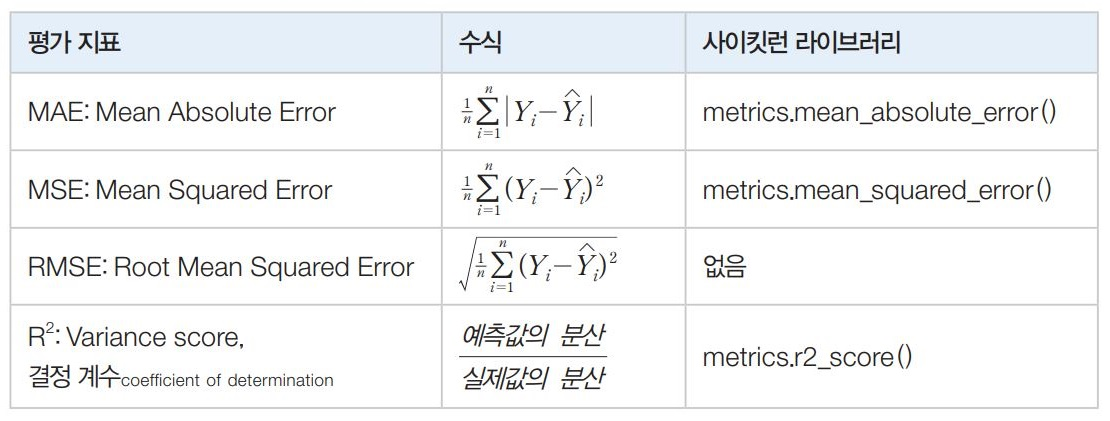

In [21]:
Image('C:/Users/com/Desktop/ML/Lecture_02/Lecture_02_figure_05.jpg', width = 600, height = 300)

In [22]:
Y_predict = lm_train.predict(X_test)
print(Y_predict)

15712    2.604726
4119     2.943962
15725    2.591385
14616    1.920884
13238    3.040748
           ...   
7665     2.017562
2196     1.554642
18162    3.442600
16305    1.636008
199      2.241782
Length: 6192, dtype: float64


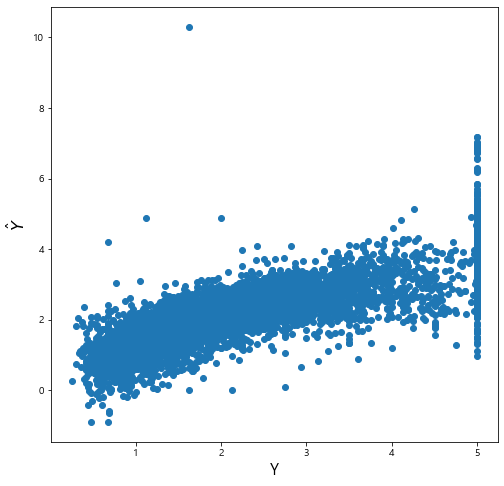

In [23]:
plt.figure(figsize=(8, 8))
plt.scatter(Y_test, Y_predict)
plt.xlabel('Y', size=16)
plt.ylabel('$\hat{Y}$', size=16)
plt.show()

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

In [25]:
# MSE(mean squared error), R-squared (모형 성능 확인)
mae = mean_absolute_error(Y_test, Y_predict)
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
r_square = r2_score(Y_test, Y_predict)
print('MAE : {0:.3f}'.format(mae))
print('MSE : {0:.3f}'.format(mse))
print('RMSE : {0:.3f}'.format(rmse))
print('R-square : {0:.3f}'.format(r_square))

MAE : 0.525
MSE : 0.531
RMSE : 0.729
R-square : 0.602


### KNN Regression

- 앞서 배운 KNN에도 회귀의 개념을 적용시킬 수 있다. 이때, 종속변수는 앞서 나온 0, 1과 같은 분류의 형태가 아닌 숫자(실수)로 표현될 때 사용 가능하다.

In [26]:
import mglearn

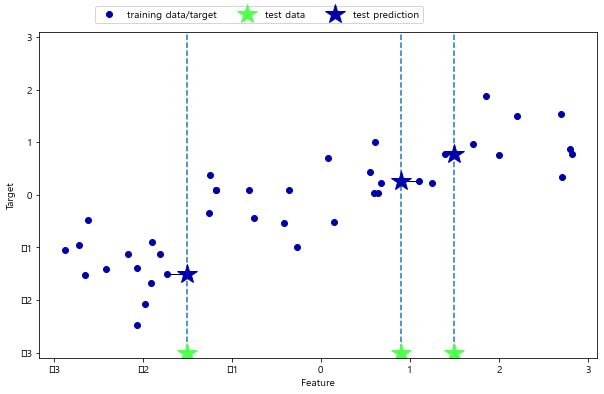

In [27]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

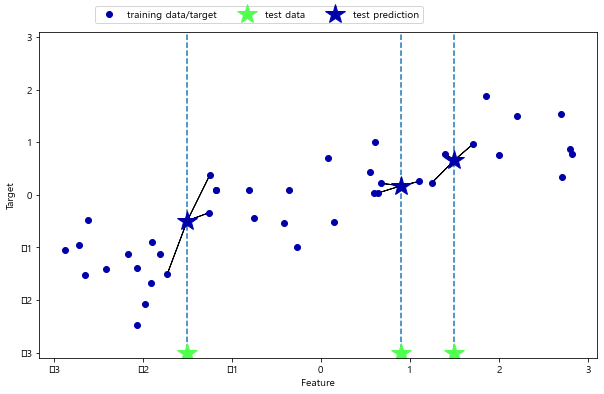

In [28]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

### KNN Regression 실습 - Toy Example

In [29]:
from sklearn.neighbors import KNeighborsRegressor

In [30]:
# wave 데이터셋 불러오기
X, Y = mglearn.datasets.make_wave(n_samples=40)

In [31]:
# 학습 데이터, 테스트 데이터 분리
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

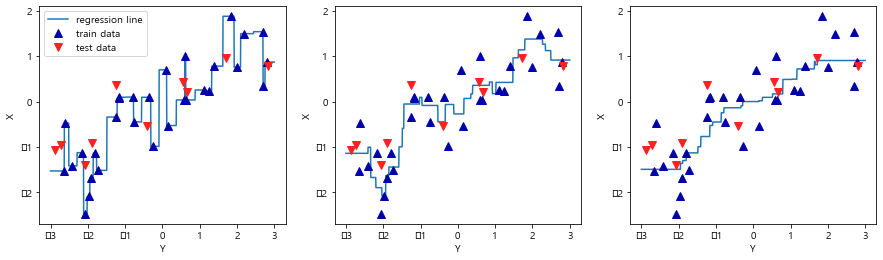

In [32]:
# K = 1, 3, 9 인 경우 KNN Regression 비교
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for k, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=k)
    reg.fit(X_train, Y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, Y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, Y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_xlabel("Y")
    ax.set_ylabel("X")
axes[0].legend(["regression line", "train data", "test data"], loc="best")

### KNN Regression v.s. Linear Regression - ToyotaCorolla 데이터셋

#### [데이터 설명]
- 사양에 따른 도요타 중고차 차량의 가격예측
- 사양정보에 따른 도요타 중고차 1,436대의 가격 데이터셋

#### 독립변수
- 내용연수 (2004년 8월 현재)
- 연비 (kilometers)
- 연료유형 (diesel, petrol, CNG)
- 마력 (horsepower)
- 금속색상 (1=yes, 0=no)
- 자동변속 (1=yes, 0=no)
- 실린더 부피 (cylinder volume)
- 자동차 문의 개수
- 분기별 도로 사용세(road tax)
- 무게 (kg)
- ...

#### 종속변수
- 판매가격 (Euros)

※ 연료유형의 경우 다음과 같이 변환이 필요하다. 이때, 'Petrol'의 경우 'Diesel'과 'CNG' 변수가 모두 0인 경우로 판단한다. (변수 생성 필요 없음)
- Diesel (1=yes, 0=no)
- CNG (1=yes, 0=no)
- None needed for “Petrol” (reference category)

In [33]:
corolla = pd.read_csv("C:/Users/com/Desktop/ML/Lecture_02/ToyotaCorolla.csv")
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [34]:
corolla.shape

(1436, 37)

In [35]:
# Dummy변수 생성
n = corolla.shape[0]
dummy_d = np.repeat(0,n)
dummy_c = np.repeat(0,n)
index_d = np.array(corolla.Fuel_Type == "Diesel")
index_c = np.array(corolla.Fuel_Type == "CNG")

In [36]:
print(index_d)

[ True  True  True ... False False False]


In [37]:
print(index_c)

[False False False ... False False False]


In [38]:
# Dummy 변수 추가, 미사용 변수, NA 제거
Fuel = pd.DataFrame({'Diesel': dummy_d, 'CNG': dummy_c})
corolla_df = corolla.dropna().drop(['Id','Model','Fuel_Type'], axis = 1, inplace = False)
corolla_df = pd.concat((corolla_df, Fuel), axis = 1)
corolla_df.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Diesel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,1,0,0,0,1,0,0,0,0,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,1,0,0,0,1,0,0,0,0,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,1,0,0,0,1,0,0,0,0,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,1,0,0,0,1,0,0,0,0,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,1,0,1,0,1,0,0,0,0,0


In [39]:
corolla_df.shape

(1436, 36)

In [40]:
corolla_df.shape

(1436, 36)

In [41]:
# 독립변수와 종속변수 분리
feature_columns = list(corolla_df.columns.difference(['Price']))
X = corolla_df[feature_columns]
Y = corolla_df.Price

In [42]:
# 학습 데이터, 테스트 데이터 분리
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1005, 35) (431, 35) (1005,) (431,)


#### KNN Regression

In [43]:
import sklearn.preprocessing as preprocessing
from sklearn.neighbors import KNeighborsRegressor

In [44]:
# 변수 값 정규화
preprocessor = preprocessing.Normalizer()
X_train_kr = preprocessor.fit_transform(X_train)
X_test_kr = preprocessor.transform(X_test)

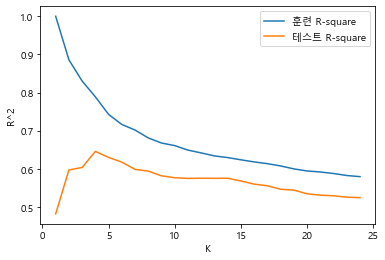

In [45]:
training_rsquare = []
test_rsquare = []
# 여러 k값에 대한 모델 생성 n_neighbors 를 적용
k_settings = range(1, 25)

for k in k_settings:
    # 모델 생성
    corolla_knn = KNeighborsRegressor(n_neighbors=k)
    corolla_knn.fit(X_train_kr, Y_train)
    # 훈련 세트 정확도 저장
    training_rsquare.append(corolla_knn.score(X_train_kr, Y_train))
    # 일반화 정확도 저장
    test_rsquare.append(corolla_knn.score(X_test_kr, Y_test))

# K의 변황량에 따른 예측정확도 성능 비교
plt.plot(k_settings, training_rsquare, label="훈련 R-square")
plt.plot(k_settings, test_rsquare, label="테스트 R-square")
plt.ylabel("R^2")
plt.xlabel("K")
plt.legend()

In [46]:
# 최적의 K 판단
from itertools import compress
best_k_temp = test_rsquare==max(test_rsquare)
best_k = list(compress(k_settings, best_k_temp))[0]
print('최적의 K값:', best_k)

최적의 K값: 4


In [47]:
# 최적의 K값에서 테스트 데이터의 Y예측값
best_corolla_knn = KNeighborsRegressor(n_neighbors=best_k)
best_corolla_knn.fit(X_train_kr, Y_train)
Y_predict_kr = best_corolla_knn.predict(X_test_kr)
print(Y_predict_kr)

[11162.5  10785.   12222.5   7725.25 11037.5  12448.75  9611.25  8900.
  8925.    9012.5  11225.    8225.    8800.   10325.    7275.    8325.
  7237.5   8787.5  16225.    6275.   16225.    8162.5   7637.5   7575.
 10862.5  19737.5   8700.   11057.5  21175.    9012.5   8987.5   8972.5
 12155.   17775.   23656.25 11775.   13525.    7661.25  7862.5  11900.
 11147.5   8962.5   9087.5   7387.5   9037.5   9722.5   9825.    8475.
  7975.    8785.    9112.5   8925.    8725.    8012.5   7975.   17942.
  9737.5  10110.   14075.    7000.   15573.75  8162.5   9275.   10561.25
 10025.   17225.   10025.    8925.    8650.   10925.    8785.    9300.
  9437.5   7975.    7687.5   9337.5   7975.    9011.25  9100.   12162.5
 11962.5   8650.    7950.   10836.25  8787.5   8925.   12387.5  10850.
 10712.5   7600.   10175.   11050.   10661.25 10986.25  8137.5   8973.75
 11537.5   8800.    9725.    8900.    9525.   10535.   12762.5   9287.5
 11412.5  19337.5  11098.75  7887.5   9300.   10422.5   8460.   11675.

#### Linear Regression

In [48]:
# intercept 추가
corolla_df = sm.add_constant(corolla_df, has_constant='add')
corolla_df.head()

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Diesel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,1,0,0,0,1,0,0,0,0,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,1,0,0,0,1,0,0,0,0,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,1,0,0,0,1,0,0,0,0,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,1,0,0,0,1,0,0,0,0,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,1,0,1,0,1,0,0,0,0,0


In [49]:
lm = sm.OLS(Y_train, X_train)
lm_train = lm.fit()

In [50]:
lm_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     300.2
Date:                Fri, 17 Sep 2021   Prob (F-statistic):               0.00
Time:                        12:26:15   Log-Likelihood:                -8485.8
No. Observations:                1005   AIC:                         1.704e+04
Df Residuals:                     973   BIC:                         1.719e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -237.0237    139.800     -1.695      0.090    -511.367      37.320
Age_08_04         -119.6121      4.244    -28.181      0.000    -127.942    -111.283
Airbag_1           295.1593    301.913      0.978      0.328    -297.316     887.635
Airbag_2           -55.7698    144.255     -0.387      0.699    -338.856     227.316
Airco              184.4450     97.560      1.891      0.059      -7.008     375.898
Automatic          455.0164    159.718      2.849      0.004     141.585     768.448
Automatic_airco   2463.8879    202.140     12.189      0.000    2067.208    2860.568
BOVAG_Guarantee    427.0550    141.004      3.029      0.003     150.348     703.762
Backseat_Divider   -37.9778    139.758     -0.272      0.786    -312.240     236.284
Boardcomputer     -372.4103    126.129     -2.953      0.003    -619.926    -124.895
CD_Player          163.4510    109.367      1.495      0.135     -51.171     378.073
CNG              -1.167e-08   3.09e-09     -3.772      0.000   -1.77e-08    -5.6e-09
Central_Lock        19.7611    164.708      0.120      0.905    -303.462     342.984
Cylinders           -0.0307      0.002    -13.312      0.000      -0.035      -0.026
Diesel           -6.916e-09   8.76e-10     -7.896      0.000   -8.63e-09    -5.2e-09
Doors               73.9733     43.425      1.703      0.089     -11.243     159.190
Gears              158.7685    206.469      0.769      0.442    -246.408     563.945
Guarantee_Period    77.2049     15.140      5.100      0.000      47.495     106.915
HP                  32.8136      3.296      9.954      0.000      26.345      39.283
KM                  -0.0170      0.001    -12.324      0.000      -0.020      -0.014
Met_Color            9.9779     82.344      0.121      0.904    -151.614     171.569
Metallic_Rim       256.9196    104.300      2.463      0.014      52.240     461.599
Mfg_Month          -94.3365     11.228     -8.402      0.000    -116.370     -72.303
Mfg_Year             2.4251      0.801      3.029      0.003       0.854       3.996
Mfr_Guarantee      186.3285     80.487      2.315      0.021      28.381     344.276
Mistlamps          -56.4834    116.342     -0.485      0.627    -284.794     171.827
Power_Steering    -454.6367    341.705     -1.330      0.184   -1125.201     215.927
Powered_Windows    374.0198    164.153      2.278      0.023      51.885     696.154
Quarterly_Tax       12.9603      1.642      7.894      0.000       9.738      16.182
Radio             -363.2936    836.204     -0.434      0.664   -2004.264    1277.677
Radio_cassette     336.4718    838.585      0.401      0.688   -1309.172    1982.116
Sport_Model        355.3831     94.491      3.761      0.000     169.954     540.813
Tow_Bar           -160.1461     86.954     -1.842      0.066    -330.786      10.494
Weight               9.

In [51]:
Y_predict_lr = lm_train.predict(X_test)
print(Y_predict_lr)

509     11395.230598
435     10444.359594
321     13155.675485
1055     6221.670002
288     12817.268153
            ...     
1430     8033.311123
868     10398.185015
478     10904.273061
1173     7113.896685
419      9708.545653
Length: 431, dtype: float64


#### Result: KNN Regression v.s. Linear Regression

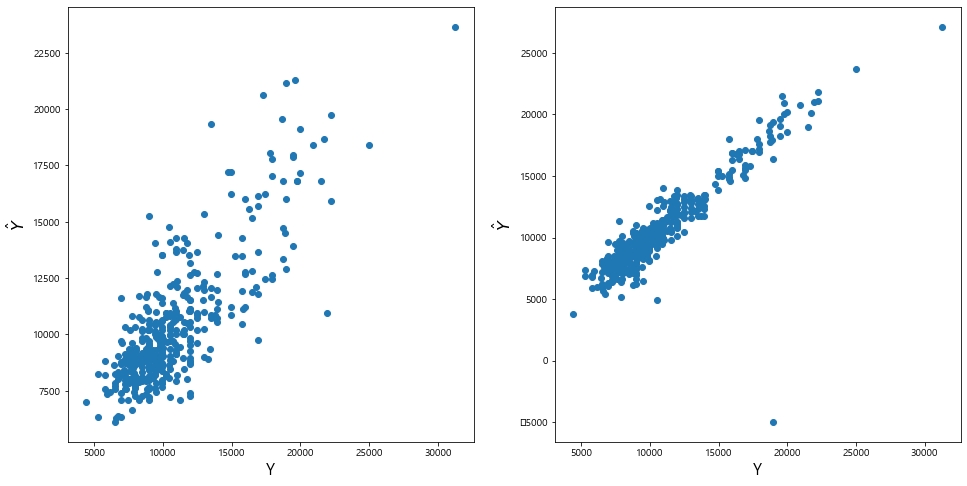

In [52]:
plt.figure(figsize = (16, 8))
plt.subplot(1, 2, 1)
plt.scatter(Y_test, Y_predict_kr)
plt.xlabel('Y', size = 16)
plt.ylabel('$\hat{Y}$', size = 16)
plt.subplot(1, 2, 2)
plt.scatter(Y_test, Y_predict_lr)
plt.xlabel('Y', size = 16)
plt.ylabel('$\hat{Y}$', size = 16)
plt.show()

In [53]:
# MSE(mean squared error), R-squared (모형 성능 비교)
mae_kr = mean_absolute_error(Y_test, Y_predict_kr)
mae_lr = mean_absolute_error(Y_test, Y_predict_lr)
mse_kr = mean_squared_error(Y_test, Y_predict_kr)
mse_lr = mean_squared_error(Y_test, Y_predict_lr)
rmse_kr = np.sqrt(mse_kr)
rmse_lr = np.sqrt(mse_lr)
r_square_kr = r2_score(Y_test, Y_predict_kr)
r_square_lr = r2_score(Y_test, Y_predict_lr)
print('MAE from KNN Regression : {0:.3f}'.format(mae_kr))
print('MAE from Linear Regression : {0:.3f}'.format(mae_lr))
print('MSE from KNN Regression : {0:.3f}'.format(mse_kr))
print('MSE from Linear Regression : {0:.3f}'.format(mse_lr))
print('RMSE from KNN Regression : {0:.3f}'.format(rmse_kr))
print('RMSE from Linear Regression : {0:.3f}'.format(rmse_lr))
print('R-square from KNN Regression : {0:.3f}'.format(r_square_kr))
print('R-square from Linear Regression : {0:.3f}'.format(r_square_lr))

MAE from KNN Regression : 1544.914
MAE from Linear Regression : 874.241
MSE from KNN Regression : 4477278.351
MSE from Linear Regression : 2464699.091
RMSE from KNN Regression : 2115.958
RMSE from Linear Regression : 1569.936
R-square from KNN Regression : 0.647
R-square from Linear Regression : 0.805
